Assisgnment

- you have to take one dataset from kaggle from any where(web)
- train you custom word2vec model
- then suppers dimesion of vectors into 2 dimesion using PCA(dimesion reduction)
- then plot the data using graph(plot 2-d data)
- check the similarity between the words then send it to me inside th chat section keep your soltion over the
- github or drive and send the link in the community chat

In [1]:
import pandas as pd
import numpy as np
import os
import gensim
import nltk

In [2]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [3]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [4]:
f = open(r"/content/Eastern-Spirituality-Classics-1_-Vyasa_-Ved-_-Publishings_-Bhakti-Bhav-Bhagavad-Gita_-Complete-Bhaga.txt")

In [5]:
corpus = f.read()

In [6]:
print(corpus)

BHAGAVAD GITA





Complete Bhagavad Gita In Simple English To Understand The Divine Song Of God





Copyright © 2021 Bhakti Bhav Publishings

All rights reserved



The characters and events portrayed in this book are fictitious. Any similarity to real persons, living or dead, is coincidental and not intended by the author.



No part of this book may be reproduced, or stored in a retrieval system, or transmitted in any form or by any means, electronic, mechanical, photocopying, recording, or otherwise, without express written permission of the publisher.



Library of Congress Control Number: 2018675309

Printed in the United States of America





MESSAGE FROM THE AUTHOR





I am grateful that you have chosen this version of the Bhagavad Gita. I hope the timeless wisdom present in this book will guide you in your spiritual journey. The verses and knowledge present in this ancient scripture have changed my life in a positive way.

Till now, there are numerous versions of the Bhagav

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords

In [10]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
def remove_stop_words(text):
    new_text=[]
    for words in text.split():
        if words in stopwords.words("english"):
            new_text.append("")
        else:
            new_text.append(words.strip())
    return " ".join(new_text).replace("  "," ")

In [12]:
corpus = remove_stop_words(corpus)

In [13]:
print(corpus)

BHAGAVAD GITA Complete Bhagavad Gita In Simple English To Understand The Divine Song Of God Copyright © 2021 Bhakti Bhav Publishings All rights reserved The characters events portrayed  book fictitious. Any similarity real persons, living dead, coincidental  intended  author. No part  book may reproduced, stored  retrieval system, transmitted  form  means, electronic, mechanical, photocopying, recording, otherwise, without express written permission  publisher. Library Congress Control Number: 2018675309 Printed  United States America MESSAGE FROM THE AUTHOR I grateful  chosen version  Bhagavad Gita. I hope timeless wisdom present  book guide  spiritual journey. The verses knowledge present  ancient scripture changed life  positive way. Till now,  numerous versions  Bhagavad Gita published. Some  complex understand,  simple yet divine. In version  Bhagavad Gita,  verses content  original Bhagavad Gita Mahabharata. I compiled  verses  original Bhagavad Gita explained meaning simple Engl

In [14]:
import re
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub("",text)

In [15]:
corpus = remove_url(corpus)

In [16]:
corpus

'BHAGAVAD GITA Complete Bhagavad Gita In Simple English To Understand The Divine Song Of God Copyright © 2021 Bhakti Bhav Publishings All rights reserved The characters events portrayed  book fictitious. Any similarity real persons, living dead, coincidental  intended  author. No part  book may reproduced, stored  retrieval system, transmitted  form  means, electronic, mechanical, photocopying, recording, otherwise, without express written permission  publisher. Library Congress Control Number: 2018675309 Printed  United States America MESSAGE FROM THE AUTHOR I grateful  chosen version  Bhagavad Gita. I hope timeless wisdom present  book guide  spiritual journey. The verses knowledge present  ancient scripture changed life  positive way. Till now,  numerous versions  Bhagavad Gita published. Some  complex understand,  simple yet divine. In version  Bhagavad Gita,  verses content  original Bhagavad Gita Mahabharata. I compiled  verses  original Bhagavad Gita explained meaning simple Eng

In [17]:
raw_text = sent_tokenize(corpus)

In [18]:
raw_text

['BHAGAVAD GITA Complete Bhagavad Gita In Simple English To Understand The Divine Song Of God Copyright © 2021 Bhakti Bhav Publishings All rights reserved The characters events portrayed  book fictitious.',
 'Any similarity real persons, living dead, coincidental  intended  author.',
 'No part  book may reproduced, stored  retrieval system, transmitted  form  means, electronic, mechanical, photocopying, recording, otherwise, without express written permission  publisher.',
 'Library Congress Control Number: 2018675309 Printed  United States America MESSAGE FROM THE AUTHOR I grateful  chosen version  Bhagavad Gita.',
 'I hope timeless wisdom present  book guide  spiritual journey.',
 'The verses knowledge present  ancient scripture changed life  positive way.',
 'Till now,  numerous versions  Bhagavad Gita published.',
 'Some  complex understand,  simple yet divine.',
 'In version  Bhagavad Gita,  verses content  original Bhagavad Gita Mahabharata.',
 'I compiled  verses  original Bhaga

In [19]:
len(raw_text)

1473

In [22]:
from gensim.models import Word2Vec,KeyedVectors
import gensim.downloader as api

In [23]:
model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [24]:
dir(model)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 '_upconvert_old_d2vkv',
 '_upconvert_old_vocab',
 'add_lifecycle_event',
 'add_vector',
 'add_vectors',
 'allocate_vecattrs',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'expandos',
 'fill_norms',
 'get_index',
 'get_mean_vector',
 'get_normed_vectors',
 'get_vecattr',
 'get_vector',
 'has_index_for',
 'index2entity',
 'index2word',
 'index_to_key',
 'init_sims',
 

In [25]:
story=[]
for sent in raw_text:
    story.append(simple_preprocess(sent))

In [26]:
story[0]

['bhagavad',
 'gita',
 'complete',
 'bhagavad',
 'gita',
 'in',
 'simple',
 'english',
 'to',
 'understand',
 'the',
 'divine',
 'song',
 'of',
 'god',
 'copyright',
 'bhakti',
 'bhav',
 'publishings',
 'all',
 'rights',
 'reserved',
 'the',
 'characters',
 'events',
 'portrayed',
 'book',
 'fictitious']

In [27]:
custom_model=gensim.models.Word2Vec(window=10,min_count=5,vector_size=150)

In [28]:
custom_model.build_vocab(story)

In [29]:
custom_model.corpus_count

1473

In [30]:
custom_model.epochs

5

In [31]:
custom_model.corpus_total_words

25538

In [32]:
custom_model.min_count

5

In [33]:
custom_model.train(story,total_examples=custom_model.corpus_count, epochs=5)

(67513, 127690)

In [35]:
custom_model.wv["bhakti"]

array([ 0.0706162 , -0.06363721, -0.00230661, -0.01777121,  0.03487894,
       -0.05713844,  0.02628927,  0.12742355,  0.04150483,  0.04468187,
        0.00651954,  0.01665051, -0.1401745 ,  0.02562929, -0.08240378,
        0.01785774,  0.042786  , -0.0083898 , -0.00191367,  0.05126503,
       -0.07356622, -0.023545  ,  0.0543526 ,  0.08478121,  0.05143746,
        0.0336089 , -0.09602883, -0.11956789, -0.080084  , -0.08041488,
       -0.09238201,  0.02489233, -0.08430418, -0.01366704, -0.04369719,
       -0.01843703,  0.1069949 ,  0.00844564,  0.02213584, -0.03282939,
        0.00530041,  0.02920363, -0.00926674, -0.0805238 ,  0.12564766,
        0.00375568,  0.03917624,  0.04676528,  0.07209098,  0.05007631,
       -0.02030326,  0.00897803,  0.00796578,  0.06262629, -0.04348521,
        0.04571003, -0.02047499,  0.07199142, -0.05158761,  0.01624705,
       -0.02559972, -0.10761412, -0.10048874, -0.0067117 , -0.01502924,
       -0.03749715, -0.04450428, -0.1450305 , -0.10965207, -0.09

In [63]:
custom_model.wv["arjuna"]

array([ 0.29620922, -0.21742941, -0.01037111, -0.04687605,  0.14685966,
       -0.22331157,  0.11625981,  0.4672061 ,  0.1488739 ,  0.18720853,
        0.0035376 ,  0.06059441, -0.51504093,  0.10350119, -0.29978532,
        0.0928634 ,  0.15295613, -0.03949412, -0.02368481,  0.2105707 ,
       -0.2888604 , -0.06608576,  0.20072399,  0.31872258,  0.1825055 ,
        0.11743152, -0.37765104, -0.46847257, -0.3165248 , -0.288406  ,
       -0.36892086,  0.12075666, -0.31923077, -0.07663612, -0.14765556,
       -0.06466654,  0.41165546,  0.03651959,  0.09480859, -0.14449225,
        0.03637153,  0.08337752, -0.02053246, -0.3132888 ,  0.4661402 ,
        0.02784072,  0.12919864,  0.16487607,  0.25793433,  0.16074747,
       -0.08112241,  0.04297579,  0.03656437,  0.23480192, -0.17083432,
        0.18599811, -0.05773938,  0.28276268, -0.18729644,  0.06649455,
       -0.10680699, -0.39772987, -0.38242778,  0.00214709, -0.02588421,
       -0.14882888, -0.18443637, -0.52710384, -0.40795672, -0.39

In [36]:
custom_model.wv["bhakti"].shape

(150,)

In [37]:
custom_model.wv.most_similar("bhakti")

[('lord', 0.9986211061477661),
 ('verse', 0.9985449910163879),
 ('truth', 0.99851393699646),
 ('brahma', 0.9985027313232422),
 ('desires', 0.9985015988349915),
 ('arjuna', 0.9984973073005676),
 ('material', 0.9984917640686035),
 ('knowledge', 0.9984894394874573),
 ('it', 0.9984893798828125),
 ('the', 0.9984853863716125)]

In [56]:
custom_model.wv.most_similar("material")

[('to', 0.9983636736869812),
 ('krishna', 0.9983385801315308),
 ('arjuna', 0.9983234405517578),
 ('explained', 0.998315155506134),
 ('dedicate', 0.9983042478561401),
 ('gita', 0.9983003735542297),
 ('form', 0.9983003735542297),
 ('the', 0.9982910752296448),
 ('aware', 0.9982792735099792),
 ('loving', 0.9982766509056091)]

In [57]:
custom_model.wv.similarity("bhakti","material")

0.9981775

In [58]:
custom_model.wv.similarity("bhakti","love")

0.9994258

In [59]:
custom_model.wv.doesnt_match(["bhakti","material","love"])

'material'

In [48]:
X = custom_model.wv[custom_model.wv.index_to_key]

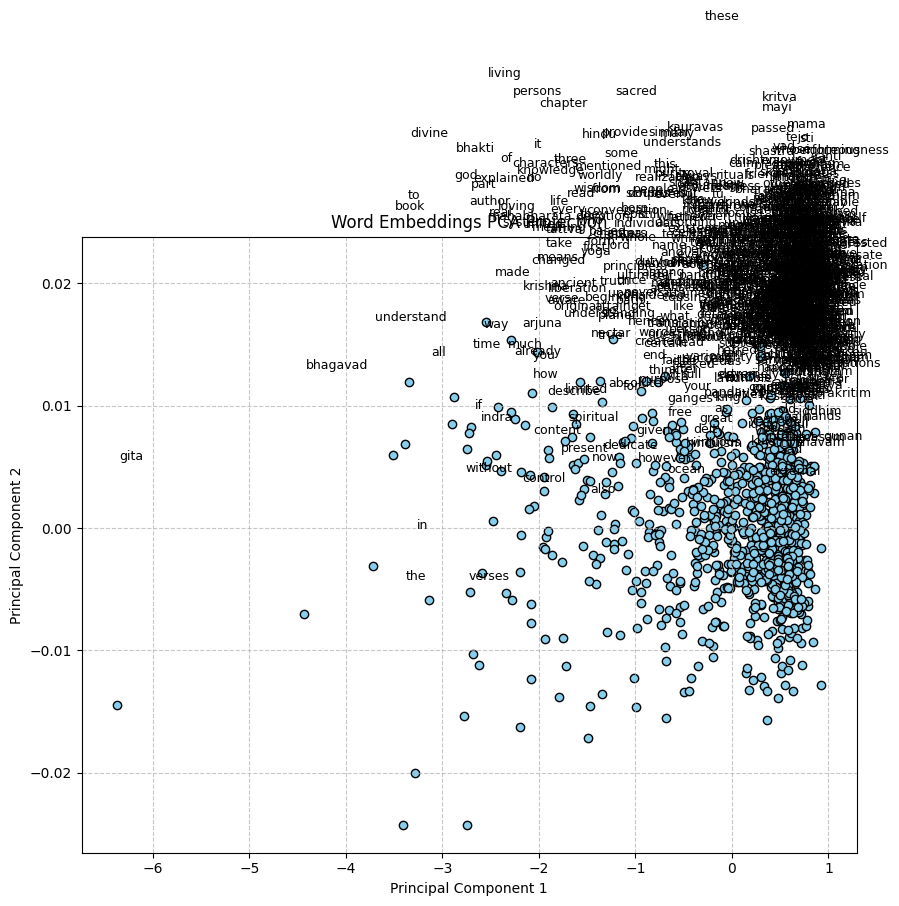

In [61]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_transform = pca.fit_transform(X)

# Create the plot
plt.figure(figsize=(10, 8))
plt.scatter(pca_transform[:, 0], pca_transform[:, 1], c='skyblue', edgecolor='k')

# Annotate points with word labels
for i, word in enumerate(custom_model.wv.index_to_key):
    plt.text(pca_transform[i, 0] + 0.02, pca_transform[i, 1] + 0.02, word, fontsize=9)

plt.title("Word Embeddings PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
